In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# **1 Supervised learning**
1.1 Import the monthly and annual data and join

In Assignment #3, you created five different feature families that capture annual and monthly
aggregations. Here, you will model the retail problem with two approaches: using annual
and monthly features. Therefore, you need to create the joined tables based on the following
logic:

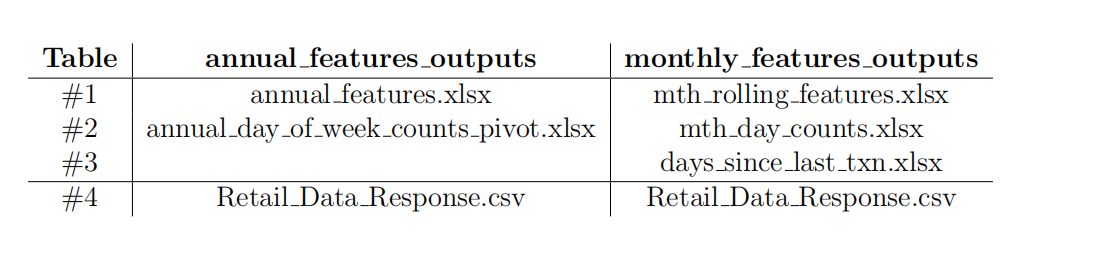
In both the annual and monthly features approach, you need to join at the end with table#4, the clients responses. This is simply a table that contains the binary response of the
client to our marketing effort as described above and that is the output or label or target
that makes this a supervised learning problem.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_Response = pd.read_csv('drive/MyDrive/CHE1147/A3/Retail_Data_Response.csv')

In [4]:
annual_features = pd.read_excel('drive/MyDrive/CHE1147/A3/annual_features.xlsx')
annual_pivot = pd.read_excel('drive/MyDrive/CHE1147/A3/annual_day_of_week_counts_pivot.xlsx')
annual_features_merge = pd.merge(annual_features, annual_pivot, on = 'customer_id').merge(Data_Response, on = 'customer_id')
annual_features_merge.head()

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,0,0,0,0,0,0,0,0,0,1


**1.2 Steps for each method (10 points)**
1. Separate the inputs X and the output y in two data frames.

In [5]:
y = annual_features_merge['response']
X = annual_features_merge.drop(['customer_id', 'response'], axis = 1)

2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/3, random_state=1147)

3. Pre-process (if necessary for the method).

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Fit the training dataset and optimize the hyperparameters of the method.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [11]:
LogReg = LogisticRegression(penalty ='l1', solver = 'liblinear', random_state=1147)
grid_search = GridSearchCV(LogReg, {'C':[0.01, 0.05, 0.1, 1, 10, 100]}, scoring='f1', cv=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_hyper = grid_search.best_params_
print ("Best f1: {}".format(grid_search.best_score_))      
print('The best parameter:', best_hyper)

Best f1: 0.11820284063762328
The best parameter: {'C': 10}


In [12]:
LogReg = LogisticRegression(C=best_hyper['C'], penalty ='l1', solver = 'liblinear', random_state=1147)
LogReg.fit(X_train_scaled, y_train)

LogisticRegression(C=10, penalty='l1', random_state=1147, solver='liblinear')

In [16]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, f1_score

In [ ]:
Cs = [0.01, 0.05, 0.1, 1, 10, 100]
max_depth_range = range(1, 15)
estimator_c = [] 
accuracy_train = [] 
accuracy_test = [] 
precisions = [] 
recalls = [] 
f1_train = [] 
f1_test = [] 
auc_train = [] 
auc_test = []
for i in range(len(Cs)):
    c = Cs[i]
    estimator_c.append(LogisticRegression(penalty='l1', C = c, solver='liblinear',class_weight='balanced',random_state=1147))
    estimator_c[i].fit(X_train, y_train)

    scores_train = estimator_c[i].predict_proba(X_train)[:,1] 
    scores_test  = estimator_c[i].predict_proba(X_test)[:,1]  

    y_train_predicted = estimator_c[i].predict(X_train)
    y_test_predicted = estimator_c[i].predict(X_test)
  
    accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True))
    accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True))
     
    f1_train.append(100*f1_score(y_train, y_train_predicted))
    f1_test.append(100*f1_score(y_test, y_test_predicted))
     
    precisions.append(precision_score(y_test, y_test_predicted))
    recalls.append(recall_score(y_test, y_test_predicted))
    
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
    
    performance_df = {'ACCURACY_TRAIN': accuracy_train, 
                              'ACCURACY_TEST': accuracy_test,  
                              'F1_TRAIN': f1_train, 
                              'F1_TEST': f1_test, 
                              'PRECISION': precisions, 
                              'RECALL': recalls, 
                              'AUC_TRAIN': auc_train, 
                              'AUC_TEST': auc_test}



In [18]:
performance_df = pd.DataFrame(performance_df)
performance_df.insert(0, 'C', value = Cs)
performance_df

,C,ACCURACY_TRAIN,ACCURACY_TEST,F1_TRAIN,F1_TEST,PRECISION,RECALL,AUC_TRAIN,AUC_TEST
0,0.01,71.229294,71.263617,29.032258,31.194575,0.203956,0.662971,0.784688,0.751766
1,0.05,72.842197,72.004357,31.463146,30.502975,0.201717,0.625277,0.809359,0.746054
2,0.10,73.408893,72.004357,31.919643,30.502975,0.201717,0.625277,0.818707,0.740685
3,1.00,72.972973,71.459695,32.608696,29.418103,0.194306,0.605322,0.826830,0.733231
4,10.00,72.493461,71.372549,32.368703,29.126214,0.192445,0.598670,0.826752,0.731632
5,100.00,72.537053,71.372549,32.403433,29.126214,0.192445,0.598670,0.826720,0.731442


5. Plot coefficient values or feature importance.

In [19]:
best_model = LogisticRegression(penalty='l1',solver='liblinear', C=10, class_weight='balanced',random_state=1147)
best_model.fit(X_train_scaled, y_train)
m = best_model.coef_
    
indices = np.argsort(abs(m[0]))[::-1]
names = [X.columns[i] for i in indices]
print(f'The indices for top 2 features are: {indices[0]}:{names[0]}, {indices[1]}:{names[1]} ')

The indices for top 2 features are: 19:ann_txn_amt_min_2015, 14:ann_txn_amt_max_2015 


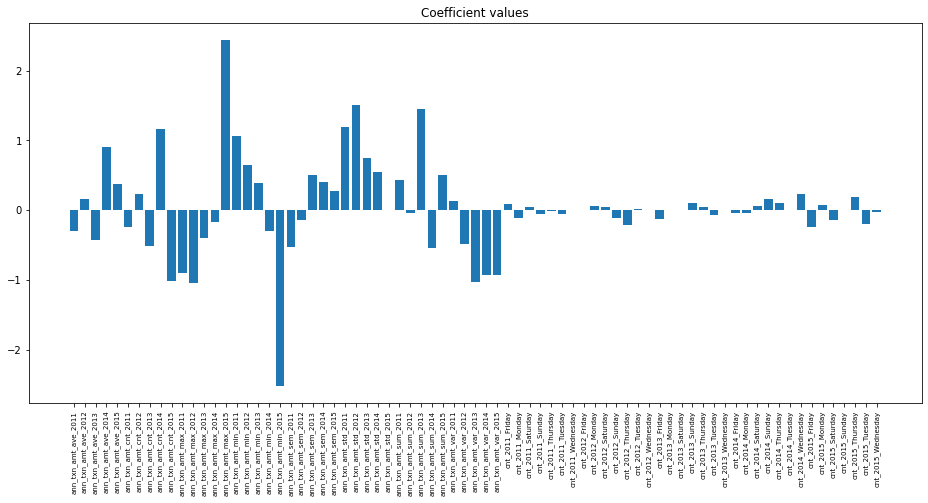

In [20]:
plt.figure(figsize=(16,7)) 
plt.bar(range(X.shape[1]), m[0])
plt.title("Coefficient values")
plt.xticks(range(X.shape[1]), X.columns, rotation=90,size=7)
plt.show()

6. Plot probability distribution for test set.

In [21]:
import seaborn as sns

In [22]:
y_test_pred = best_model.predict(X_test_scaled) 
y_test_prob = best_model.predict_proba(X_test_scaled) 

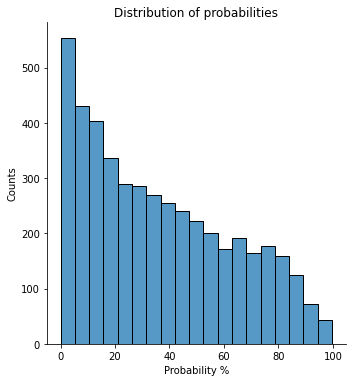

In [23]:
sns.displot(data = y_test_prob[:,1], x = 100 * y_test_prob[:,1])
plt.title('Distribution of probabilities')
plt.xlabel('Probability %')
plt.ylabel('Counts')
plt.show()

7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

In [24]:
cm = confusion_matrix(y_test.values, y_test_pred)
 
precision = cm[1,1]/cm.sum(axis=0)[1]
recall = cm[1,1]/cm.sum(axis=1)[1]
 
print('Precision:', precision)
print('Recall', recall)

Precision: 0.19361702127659575
Recall 0.6053215077605322


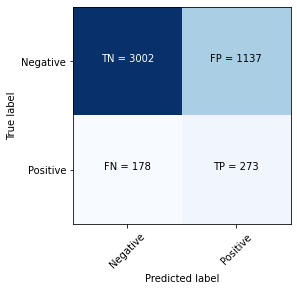

In [25]:
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 10,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

In [26]:
scores_train = best_model.predict_proba(X_train_scaled)[:, 1]
scores_test = best_model.predict_proba(X_test_scaled)[:, 1] 

In [27]:
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

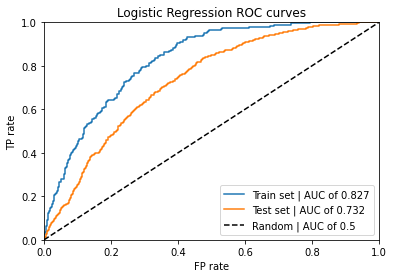

In [28]:
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Logistic Regression ROC curves')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.legend()

8. Plot decision boundary for top 2 features.

[(-2.0, 2.0),
 Text(0, 0.5, 'ann_txn_amt_max_2015'),
 (-2.0, 3.0),
 Text(0.5, 0, 'ann_txn_amt_min_2015'),
 None]

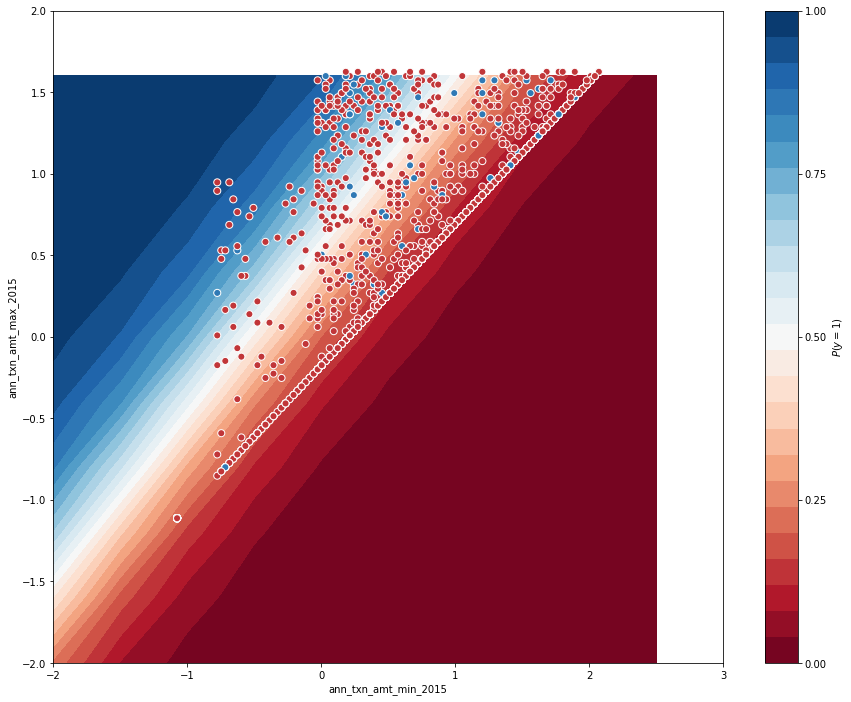

In [29]:
min_value1, min_value2 = np.floor(X_train_scaled.min(axis=0)[[19, 14]])
max_value1, max_value2 = np.ceil(X_train_scaled.max(axis=0)[[19, 14]])

step1, step2 = (max_value1-min_value1)/10, (max_value2-min_value2)/10
xx, yy = np.mgrid[min_value1:max_value1:step1, min_value2:max_value2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X.shape[1])) * np.median(X_train_scaled, axis=0)
median_inputs[:,19] = grid[:,0]
median_inputs[:,14] = grid[:,1]
 
probs = best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
 
f, ax = plt.subplots(figsize=(15,12))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_scaled[50:,19], X_train_scaled[50:,14], c=y_train[50:], s=50,cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto", xlim=(min_value1, max_value1), ylim=(min_value2, max_value2),xlabel=f"{X.columns[19]}", ylabel=f"{X.columns[14]}")

**1.3 Comparison of methods (10 points)**
Compare the two feature engineering (annual and monthly) and the three modeling approaches (L1 log-reg, tree, forests) in terms of the outcomes of steps 5-8. Which combination of feature engineering and modeling approach do you select as the best to deploy in a
production environment and why? Tabularize your findings in steps 5-8 to summarize the
results and support your decision (how to organize information with tables in Markdown).

Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [31]:
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 10)
estimator_max_depth = [] 
accuracy_train = [] 
accuracy_test = [] 
precisions = [] 
recalls = [] 
f1_train = [] 
f1_test = [] 
auc_train = [] 
auc_test = []
for i in max_depth_range:

    estimator_max_depth.append(DecisionTreeClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train, y_train)

    scores_train = estimator_max_depth[i-1].predict_proba(X_train)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test)[:,1]  

    y_train_predicted = estimator_max_depth[i-2].predict(X_train) 
    y_test_predicted = estimator_max_depth[i-2].predict(X_test) 
 
    accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True)) 
    accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True)) 
 
    f1_train.append(100*f1_score(y_train, y_train_predicted)) 
    f1_test.append(100*f1_score(y_test, y_test_predicted)) 

    precisions.append(precision_score(y_test, y_test_predicted)) 
    recalls.append(recall_score(y_test, y_test_predicted)) 

    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train) 
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test) 
 
    auc_train.append(auc(fpr_train, tpr_train)) 
    auc_test.append(auc(fpr_test, tpr_test)) 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [32]:
performance_dictionary = {'ACCURACY_TRAIN': accuracy_train, 
                              'ACCURACY_TEST': accuracy_test,  
                              'F1_TRAIN': f1_train, 
                              'F1_TEST': f1_test, 
                              'PRECISION': precisions, 
                              'RECALL': recalls, 
                              'AUC_TRAIN': auc_train, 
                              'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1


In [33]:
performance_df

,ACCURACY_TRAIN,ACCURACY_TEST,F1_TRAIN,F1_TEST,PRECISION,RECALL,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,91.455972,90.174292,0.000000,0.000000,0.000000,0.000000,0.700504,0.678205,1
1,91.455972,90.174292,0.000000,0.000000,0.000000,0.000000,0.736396,0.697802,2
2,91.455972,90.174292,0.000000,0.000000,0.000000,0.000000,0.762659,0.704718,3
3,91.499564,90.174292,1.015228,0.000000,0.000000,0.000000,0.792137,0.721851,4
4,92.632956,89.455338,34.749035,12.635379,0.339806,0.077605,0.835687,0.732913,5
5,93.461203,89.520697,42.307692,13.019892,0.352941,0.079823,0.869209,0.691296,6
6,93.940715,89.259259,47.148289,11.171171,0.298077,0.068736,0.896951,0.688964,7
7,94.594595,87.821351,56.643357,11.690363,0.203297,0.082040,0.922038,0.690096,8
8,95.422842,87.472767,64.406780,15.066470,0.225664,0.113082,0.938444,0.690501,9


When max depth = 5 Auc score reach max and F1 score is second high but close to the highest

In [34]:
best_model = DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced') 
best_model.fit(X_train, y_train) 
importances = best_model.feature_importances_ 
    
indices = np.argsort(abs(importances))[::-1]
names = [X.columns[i] for i in indices]
print(f'The indices for top 2 features are: {indices[0]}:{names[0]}, {indices[1]}:{names[1]} ')

The indices for top 2 features are: 33:ann_txn_amt_sum_2014, 32:ann_txn_amt_sum_2013 


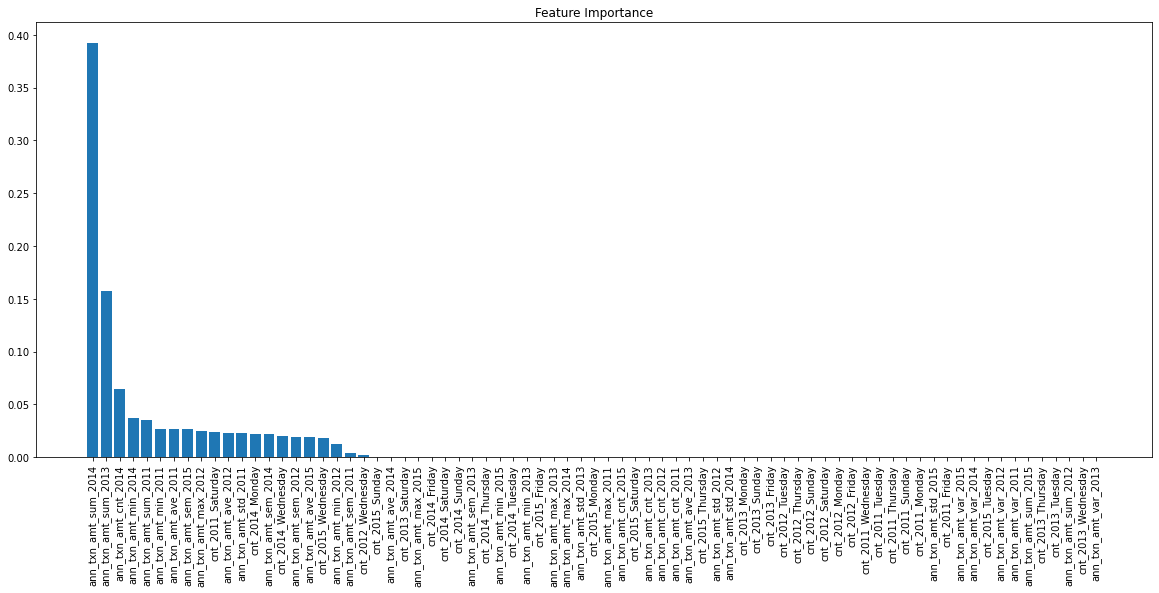

In [35]:
names = [X.columns[i] for i in indices] 
plt.figure(figsize=(20,8)) 
plt.title("Feature Importance") 
plt.bar(range(X.shape[1]), importances[indices]) 
plt.xticks(range(X.shape[1]), names, rotation=90) 
plt.show()

In [36]:
y_test_pred = best_model.predict(X_test) 
y_test_prob = best_model.predict_proba(X_test) 
 
scores_train = best_model.predict_proba(X_train)[:, 1] 
scores_test = best_model.predict_proba(X_test)[:, 1] 

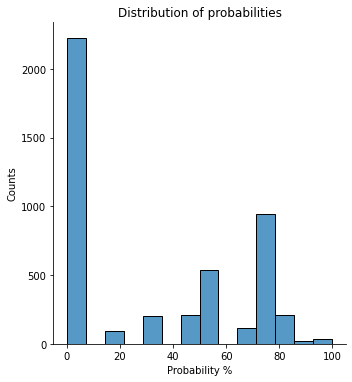

In [37]:
sns.displot(data = y_test_prob[:,0], x = 100*y_test_prob[:,1])
plt.title('Distribution of probabilities')
plt.xlabel('Probability %')
plt.ylabel('Counts')
plt.show()

In [38]:
cm = confusion_matrix(y_test.values, y_test_pred)
 
precision = cm[1,1]/cm.sum(axis=0)[1]
recall = cm[1,1]/cm.sum(axis=1)[1]
 
print('Precision:', precision)
print('Recall', recall)

Precision: 0.1706135629709365
Recall 0.7028824833702882


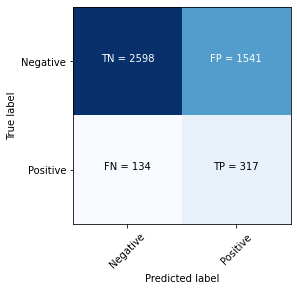

In [39]:
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 10,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

In [40]:
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

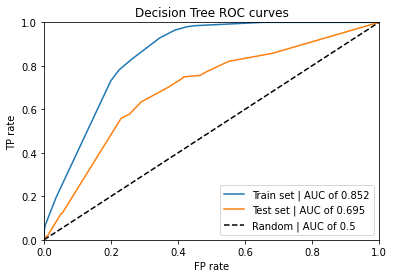

In [41]:
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


[(0.0, 1317.0),
 Text(0, 0.5, 'ann_txn_amt_sum_2013'),
 (0.0, 974.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2014'),
 None]

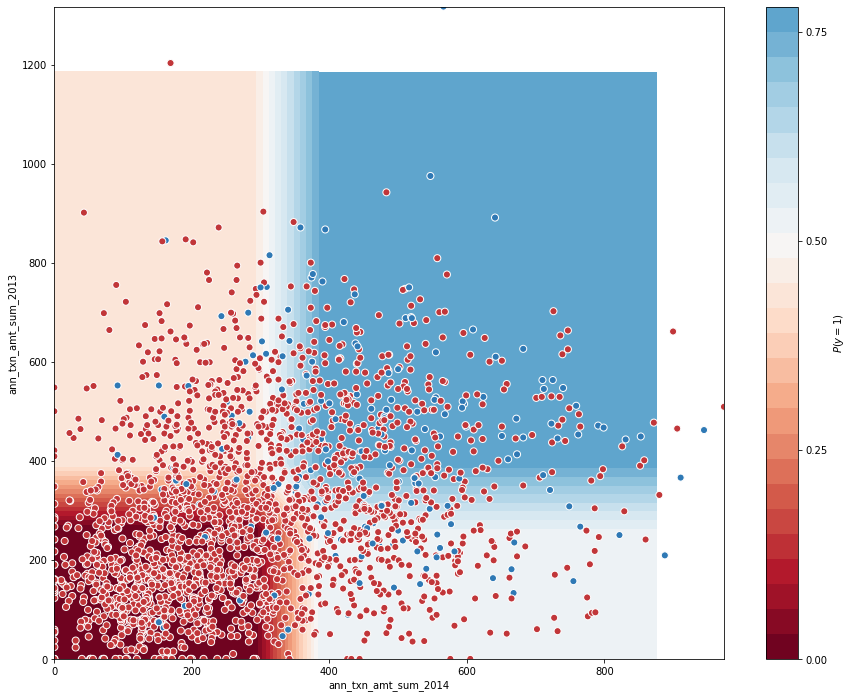

In [42]:
min_value1, min_value2 = np.floor(X_train.values.min(axis=0)[[33, 32]])
max_value1, max_value2 = np.ceil(X_train.values.max(axis=0)[[33, 32]])

step1, step2 = (max_value1-min_value1)/10, (max_value2-min_value2)/10
xx, yy = np.mgrid[min_value1:max_value1:step1, min_value2:max_value2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X.shape[1])) * np.median(X_train.values, axis=0)
median_inputs[:,33] = grid[:,0]
median_inputs[:,32] = grid[:,1]
 
probs = best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
 
f, ax = plt.subplots(figsize=(15,12))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train.values[50:,33], X_train.values[50:,32], c=y_train[50:], s=50,cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto", xlim=(min_value1, max_value1), ylim=(min_value2, max_value2),xlabel=f"{X_train.columns[33]}", ylabel=f"{X_train.columns[32]}")

Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
max_depth_range = range(1, 15)
estimator_max_depth = [] 
accuracy_train = [] 
accuracy_test = [] 
precisions = [] 
recalls = [] 
f1_train = [] 
f1_test = [] 
auc_train = [] 
auc_test = []
for i in max_depth_range:

    estimator_max_depth.append(RandomForestClassifier(max_depth = i,class_weight='balanced', random_state=1147)) 
    estimator_max_depth[i-1].fit(X_train, y_train)

    scores_train = estimator_max_depth[i-1].predict_proba(X_train)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test)[:,1]  

    y_train_predicted = estimator_max_depth[i-2].predict(X_train) 
    y_test_predicted = estimator_max_depth[i-2].predict(X_test) 
 
    accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True)) 
    accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True)) 
 
    f1_train.append(100*f1_score(y_train, y_train_predicted)) 
    f1_test.append(100*f1_score(y_test, y_test_predicted)) 

    precisions.append(precision_score(y_test, y_test_predicted)) 
    recalls.append(recall_score(y_test, y_test_predicted)) 

    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train) 
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test) 
 
    auc_train.append(auc(fpr_train, tpr_train)) 
    auc_test.append(auc(fpr_test, tpr_test)) 

In [45]:
performance_dictionary = {'ACCURACY_TRAIN': accuracy_train, 
                          'ACCURACY_TEST': accuracy_test,  
                          'F1_TRAIN': f1_train, 
                          'F1_TEST': f1_test, 
                          'PRECISION': precisions, 
                          'RECALL': recalls, 
                          'AUC_TRAIN': auc_train, 
                          'AUC_TEST': auc_test} 
performance_df = pd.DataFrame(performance_dictionary) 
performance_df.insert(0, 'MAX_DEPTH', value = max_depth_range)  

In [46]:
performance_df

,MAX_DEPTH,ACCURACY_TRAIN,ACCURACY_TEST,F1_TRAIN,F1_TEST,PRECISION,RECALL,AUC_TRAIN,AUC_TEST
0,1,62.946818,62.657952,26.975945,29.465021,0.180899,0.793792,0.775673,0.742800
1,2,62.946818,62.657952,26.975945,29.465021,0.180899,0.793792,0.798662,0.744882
2,3,65.693112,64.793028,28.519528,29.555362,0.183939,0.751663,0.828058,0.748484
3,4,69.354839,68.104575,30.464886,30.352046,0.193216,0.707317,0.860679,0.746746
4,5,72.188317,70.130719,32.983193,30.792529,0.199346,0.676275,0.901403,0.746880
5,6,76.721883,73.616558,38.194444,30.522088,0.205882,0.589800,0.937654,0.744728
6,7,82.911944,76.623094,47.027027,28.609448,0.204373,0.476718,0.965327,0.743917
7,8,87.314734,79.084967,56.631893,26.829268,0.204413,0.390244,0.985285,0.747458
8,9,91.761116,83.246187,67.244367,26.411483,0.232323,0.305987,0.991858,0.743945
9,10,93.940715,84.030501,73.624288,23.725286,0.223529,0.252772,0.997843,0.742905


I choose depth = 5 for better performance

In [47]:
best_model = RandomForestClassifier(max_depth = 5, random_state=1147, class_weight='balanced') 
best_model.fit(X_train, y_train) 
 
importances = best_model.feature_importances_ 
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices] 
print(f'The indices for top 2 features are: {indices[0]}:{names[0]}, {indices[1]}:{names[1]}')

The indices for top 2 features are: 33:ann_txn_amt_sum_2014, 8:ann_txn_amt_cnt_2014


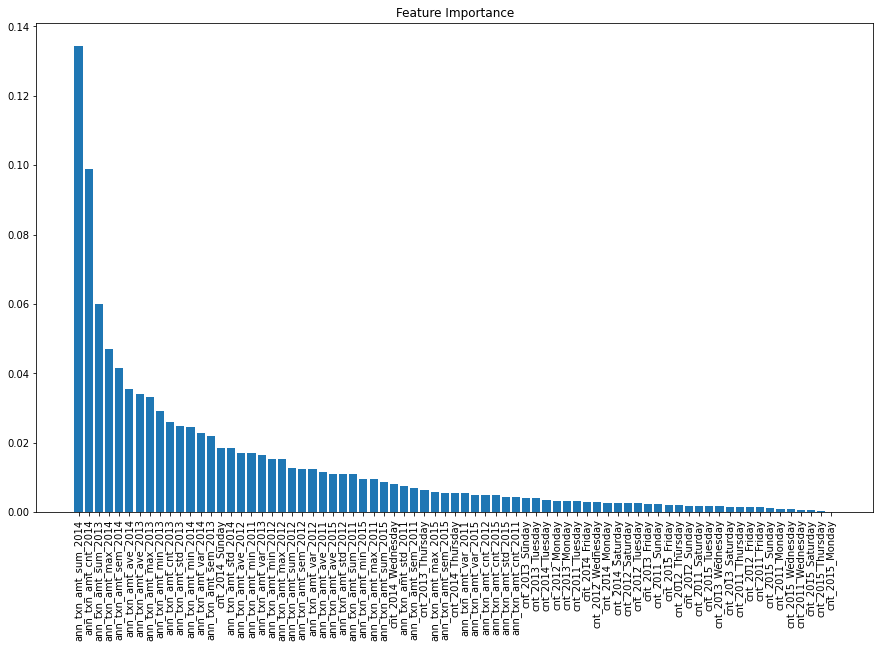

In [48]:
plt.figure(figsize=(15,9)) 
plt.title("Feature Importance") 
plt.bar(range(X.shape[1]), importances[indices]) 
plt.xticks(range(X.shape[1]), names, rotation=90) 
plt.show() 
 
y_test_pred = best_model.predict(X_test) 
y_test_prob = best_model.predict_proba(X_test) 

scores_train = best_model.predict_proba(X_train)[:, 1] 
scores_test = best_model.predict_proba(X_test)[:, 1]

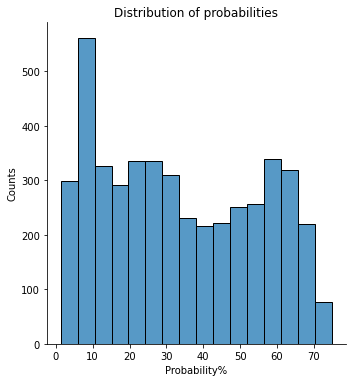

In [49]:
sns.displot(data = y_test_prob[:,1], x = 100*y_test_prob[:,1])
plt.title('Distribution of probabilities')
plt.xlabel('Probability%')
plt.ylabel('Counts')
plt.show()

In [50]:
cm = confusion_matrix(y_test.values, y_test_pred)
 
precision = cm[1,1]/cm.sum(axis=0)[1]
recall = cm[1,1]/cm.sum(axis=1)[1]
 
print('Precision:', precision)
print('Recall', recall)

Precision: 0.20588235294117646
Recall 0.5898004434589801


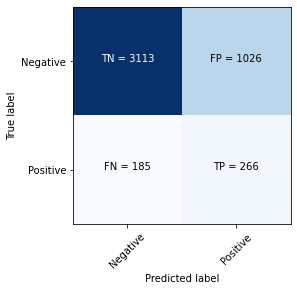

In [51]:
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 10,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

In [52]:
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

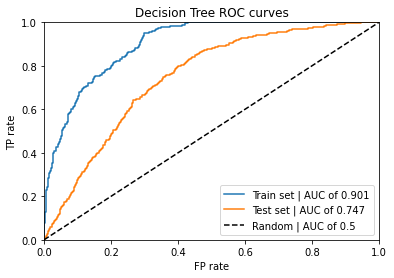

In [53]:
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[(0.0, 13.0),
 Text(0, 0.5, 'ann_txn_amt_cnt_2014'),
 (0.0, 974.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2014'),
 None]

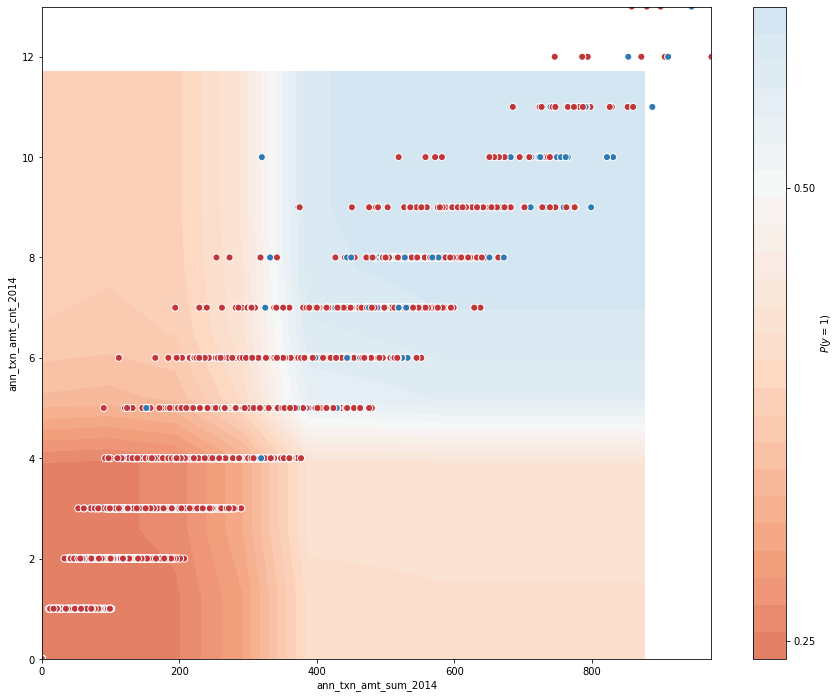

In [54]:
min_value1, min_value2 = np.floor(X_train.values.min(axis=0)[[33, 8]])
max_value1, max_value2 = np.ceil(X_train.values.max(axis=0)[[33, 8]])

step1, step2 = (max_value1-min_value1)/10, (max_value2-min_value2)/10
xx, yy = np.mgrid[min_value1:max_value1:step1, min_value2:max_value2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X.shape[1])) * np.median(X_train.values, axis=0)
median_inputs[:,33] = grid[:,0]
median_inputs[:,8] = grid[:,1]
 
probs = best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
 
f, ax = plt.subplots(figsize=(15,12))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train.values[50:,33], X_train.values[50:,8], c=y_train[50:], s=50,cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto", xlim=(min_value1, max_value1), ylim=(min_value2, max_value2),xlabel=f"{X_train.columns[33]}", ylabel=f"{X_train.columns[8]}")

| model| Precision| Recall| AUC| Accuracy|
|-------|-------|-------|-------|-------|
|LR|0.192445|0.59867|0.7316|71.37|
|DT|0.339806|0.077605|0.732913|89.455338|
|RF|0.199346|0.676275|0.746880|70.130719|	

In this case, the accuracy for Decision Tree is the highest and its recall is far lower than others.

For monthly and annually, DT have higher accuracy, and for other two models, score for annually is higher than score for monthly. This may cause by mess features number for monthly data, therefore there may have some important feature that model cannot learn for monthly data. So I think annually data can give us a more reasonable result.

And for DT in annulay, it have the highest accuracy score, but its recall have only 0.07, this is not a good model. Therefore I will choose Logistic regression to train annually data to get the better result.